In [26]:
import cv2 as cv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
import src
from src.data_generation.utils import downsample_img

In [28]:
img = cv.imread(r"C:\Users\lucam\OneDrive\Documenti\KTH\2nd_year\P1\Adv DL\Project\DD2412project\data\img_trial\abc.png")

full_size = 448
img = downsample_img(img, full_size, full_size, False)

In [29]:
def k_means_on_img(image, k, max_iter=100, epsilon=0.2, attempts=10, normalize=False, plot=False):
    flag = cv.KMEANS_RANDOM_CENTERS
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    if plot:
        # show the image
        plt.imshow(image)
        plt.show()

    if normalize:
        # normalize img to 0-255
        norm_image = cv.normalize(image, None, alpha = 0, beta = 255, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)

        image = norm_image.astype(np.uint8)

    # reshape the image to a 2D array of pixels and 3 color values (RGB)
    pixel_values = image.reshape((-1, 3))
    # convert to float
    pixel_values = np.float32(pixel_values)

    k = k
    # some documentation -> https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html
    attempts = attempts
    _, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, attempts, flag)

    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]

    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)
    if plot:
        # show the image
        plt.imshow(segmented_image)
        plt.show()
    return segmented_image

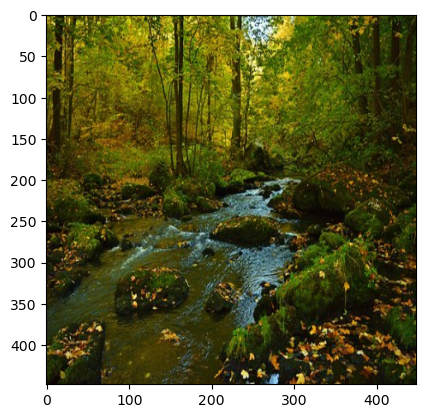

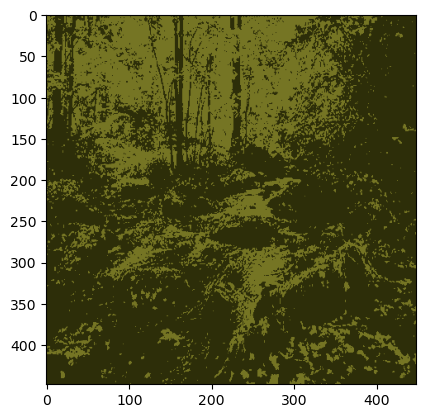

In [30]:
seg_img = k_means_on_img(img, k=2, max_iter=100, epsilon=0.2, attempts=10, normalize=False, plot=True)

In [31]:
patch_size = 14
patch = downsample_img(img, patch_size, patch_size, False)

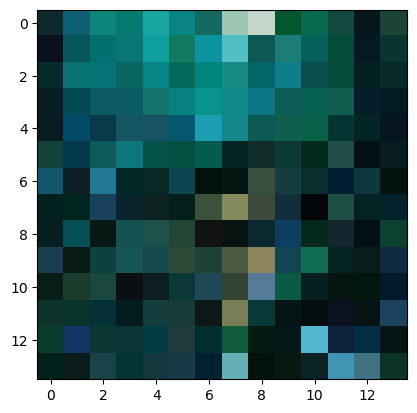

In [32]:
plt.imshow(patch)
plt.show()

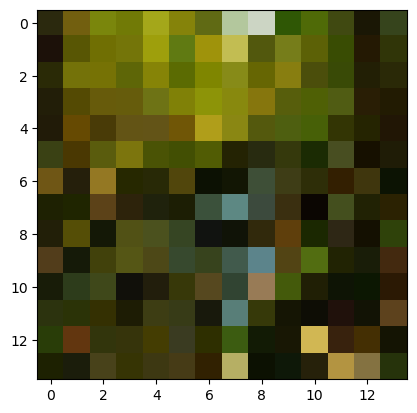

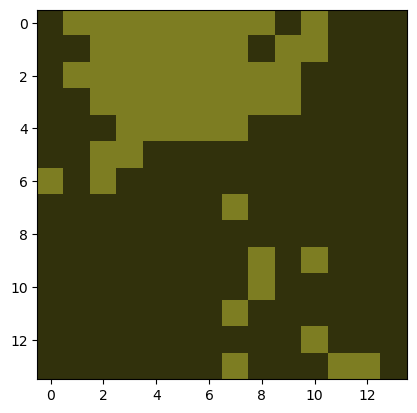

In [33]:
seg_patch = k_means_on_img(patch, k=2, max_iter=100, epsilon=0.2, attempts=10, normalize=False, plot=True)

In [34]:
seg_full = downsample_img(seg_patch, full_size, full_size, False)

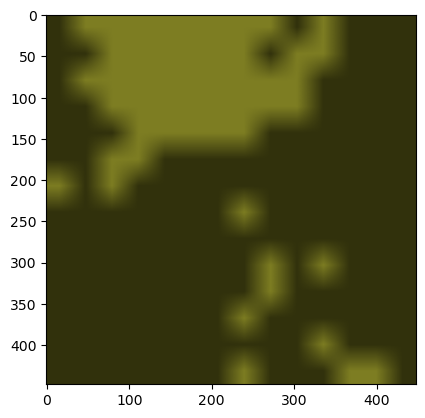

In [35]:
plt.imshow(seg_full)
plt.show()

In [51]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
stacked_img = np.stack((img_gray, ) * 3, axis=-1)
final_img = cv.addWeighted(stacked_img, 0.1, seg_full, 0.4, 0)

In [52]:
stacked_img.shape

(448, 448, 3)

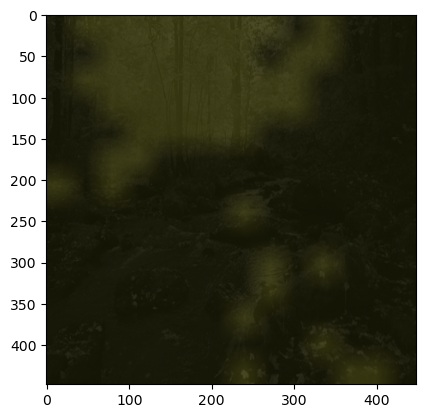

In [53]:
plt.imshow(final_img)
plt.show()